# PID KUKA

Simulação considerando um robô de 7 graus de liberdade do tipo KUKA LWR. A simulação faz uso de um arquivo do tipo urdf, que contém os dados da dinâmica do robô. O arquivo encontra-se no mesmo diretório deste notebook.

In [1]:
include("../comum.jl")
include("../modelos.jl")
using Evolutionary, Plots;
pyplot();
#plotlyjs();

In [2]:
Ts = 0.08
tend = 2.0
t0 = 0.0
xr = SVector{7}([1.,1.,0.5,0.6,0.5,1.2,0.8]);

In [3]:
function plotx()
    p1 = plot(t,x[1], label = "simulação 1")
    p1= plot!([xr[1]],seriestype= :hline, label = "referência 1")
    p2 = plot(t,x[2], label = "simulação 2")
    p2= plot!([xr[2]],seriestype= :hline, label = "referência 2")
    p3 = plot(t,x[3], label = "simulação 3")
    p3= plot!([xr[3]],seriestype= :hline, label = "referência 3")
    p4 = plot(t,x[4], label = "simulação 4")
    p4= plot!([xr[4]],seriestype= :hline, label = "referência 4")
    p5 = plot(t,x[5], label = "simulação 5")
    p5= plot!([xr[5]],seriestype= :hline, label = "referência 5")
    p6 = plot(t,x[6], label = "simulação 6")
    p6= plot!([xr[6]],seriestype= :hline, label = "referência 6")
    p7 = plot(t,x[7], label = "simulação 7")
    p7= plot!([xr[7]],seriestype= :hline, label = "referência 7")
    plot(p1,p2,p3,p4,p5,p6,p7, layout =(7,1))
end

function plotx(i::Integer)
    p1 = plot(t,x[i], label = "desejado")
    p1= plot!([xr[i]],seriestype= :hline, label = "referência");
end;    

In [4]:
kp = SMatrix{7,7}(diagm([1760.,8330.,4800.,3150.,330.,300.,10.]))
kv = SMatrix{7,7}(diagm([735.,2820.,900.,900.,130.,70.,3.]))
x, v, t, a, ta, j, tj, τ, tτ = kukaRobot(kp, kv, Ts, t0, tend, xr);

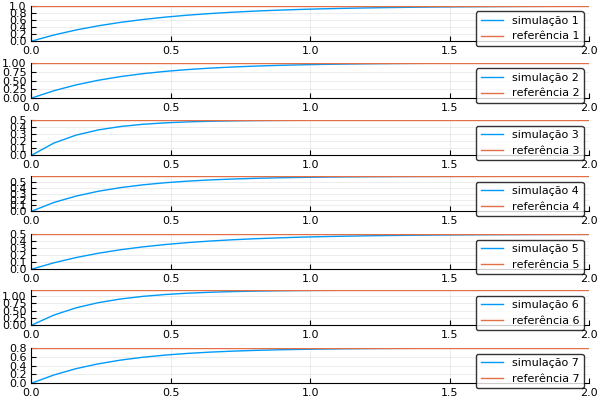

In [5]:
plotx()

In [6]:
tabela(j,"Jerk")

|              –- | junta 1 | junta 2 | junta 3 | junta 4 | junta 5 | junta 6 | junta 7 |
| ---------------:| -------:| -------:| -------:| -------:| -------:| -------:| -------:|
| **Jerk máximo** |  362.02 |  444.34 |  366.06 |  304.42 |   193.2 |  740.99 |  396.34 |
| **Jerk mínimo** |    0.12 |     0.1 |    0.01 |    0.04 |    0.01 |     0.0 |    0.01 |
|  **Jerk total** |  414.95 |  521.13 |  461.49 |  364.12 |   224.9 |  907.31 |   471.6 |


In [7]:
tabela(τ,"Torque")

|                –- | junta 1 | junta 2 | junta 3 | junta 4 | junta 5 | junta 6 | junta 7 |
| -----------------:| -------:| -------:| -------:| -------:| -------:| -------:| -------:|
| **Torque máximo** |    4.26 |   98.03 |    4.62 |   44.04 |    1.41 |    3.32 |    0.07 |
| **Torque mínimo** |    0.12 |   35.81 |    1.18 |     8.6 |    0.18 |    1.21 |     0.0 |
|  **Torque total** |   25.81 | 1148.78 |  100.61 |  261.11 |   15.57 |   35.43 |    0.14 |


In [12]:
erro = []
for i=1:7
    push!(erro, -(x[i] .- xr[i]))
end 
for i = 1:7
    println("erro final $(i) = $(erro[i][end])")
end

erro final 1 = 0.008158286452637498
erro final 2 = -0.002597959894737212
erro final 3 = -0.0009462819144570034
erro final 4 = 0.003281603023552515
erro final 5 = 0.0051417481371826
erro final 6 = -0.004049107167592325
erro final 7 = 0.0010025954960729555


In [13]:
tabela(erro, "Erro")

|              –- | junta 1 | junta 2 | junta 3 | junta 4 | junta 5 | junta 6 | junta 7 |
| ---------------:| -------:| -------:| -------:| -------:| -------:| -------:| -------:|
| **Erro máximo** |     1.0 |     1.0 |     0.5 |     0.6 |     0.5 |     1.2 |     0.8 |
| **Erro mínimo** |    0.01 |     0.0 |     0.0 |     0.0 |    0.01 |     0.0 |     0.0 |
|  **Erro total** |     5.7 |    4.66 |    1.44 |     2.5 |    2.74 |     4.1 |    3.41 |
